In [24]:
## Problem 6 

## a and b 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import trapz

college = pd.read_csv('assignment1_problem6_scores (1).csv')


In [25]:
def metrics(y_actual, y_hat,threshold):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    
    for i in range(len(y_hat)): 
        if(y_hat[i] >= threshold):
            if(y_actual[i] == 1):
                tp += 1
            else:
                fp += 1
        elif(y_hat[i] < threshold):
            if(y_actual[i] == 0):
                tn += 1
            else:
                fn += 1
            
    tpr = tp/(tp+fn)
    fpr = fp/(tn+fp)

    return [fpr,tpr]

classifier1_fpr, classifier1_tpr = metrics(college['y_true'],college['classifier1'],0.5)
classifier2_fpr, classifier2_tpr = metrics(college['y_true'],college['classifier2'],0.5)

print(classifier1_fpr, classifier1_tpr)
print(classifier2_fpr, classifier2_tpr)

0.2268041237113402 0.7747747747747747
0.1958762886597938 0.5855855855855856


In [26]:
thresholds = [0,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1]

roc1_points = []
roc2_points = [] 
for threshold in thresholds:
    rates1 = metrics(college['y_true'],college['classifier1'], threshold)
    rates2 = metrics(college['y_true'],college['classifier2'], threshold)
    roc1_points.append(rates1)
    roc2_points.append(rates2)
    

In [27]:
fpr1_array = []
tpr1_array = []
for i in range(len(roc1_points)-1):
    point1 = roc1_points[i];
    point2 = roc1_points[i+1]
    tpr1_array.append([point1[0], point2[0]])
    fpr1_array.append([point1[1], point2[1]])

fpr2_array = []
tpr2_array = []
for i in range(len(roc2_points)-1):
    point3 = roc2_points[i];
    point4 = roc2_points[i+1]
    tpr2_array.append([point3[0], point4[0]])
    fpr2_array.append([point3[1], point4[1]])

In [29]:
# Trapezoidal rule to calculate the area under the curve and approximating the intergral  
auc1 = sum(np.trapz(tpr1_array,fpr1_array))+1
print('Classifier 1 Area under curve={}'.format(auc1))

auc2 = sum(np.trapz(tpr2_array,fpr2_array))+1
print('Classifier 2 Area under curve={}'.format(auc2))

Classifier 1 Area under curve=0.830547041887248
Classifier 2 Area under curve=0.7297761679204978


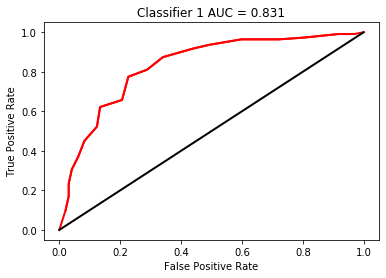

In [31]:
plt.plot(tpr1_array,fpr1_array, 'r', lw=2)
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classifier 1 AUC = {}'.format(round(auc1,3)))
plt.show()

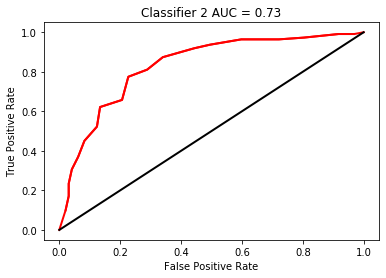

In [32]:
plt.plot(tpr1_array,fpr1_array, 'r', lw=2)
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classifier 2 AUC = {}'.format(round(auc2,3)))
plt.show()

In [33]:
## Classifier 1 and 2 have similar performance value than one another. T
## This is interpretted by looking at their AUC, which is 0.833 and 0.799. 
## The area under the curve is shown below. Classifier 1 performs better than Classifier 2. 

In [40]:
## c - Precision-Recall Score 

def precision_recall(y_actual, y_hat,threshold):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    
    for i in range(len(y_hat)): 
        if(y_hat[i] >= threshold):
            if(y_actual[i] == 1):
                tp += 1
            else:
                fp += 1
        elif(y_hat[i] < threshold):
            if(y_actual[i] == 0):
                tn += 1
            else:
                fn += 1
            
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)

    return [precision,recall]

classifier1_precision, classifier1_recall = precision_recall(college['y_true'],college['classifier1'],0.5)
classifier2_precision, classifier2_recall = precision_recall(college['y_true'],college['classifier2'],0.5)

print(classifier1_precision, classifier1_recall)
print(classifier2_precision, classifier2_recall)


0.7962962962962963 0.7747747747747747
0.7738095238095238 0.5855855855855856


In [43]:
precision1_array = []
recall1_array = []
for i in range(len(pr1_points)-1):
    point1 = pr1_points[i];
    point2 = pr1_points[i+1]
    precision1_array.append([point1[0], point2[0]])
    recall1_array.append([point1[1], point2[1]])

precision2_array = []
recall2_array = []
for i in range(len(pr2_points)-1):
    point3 = pr2_points[i];
    point4 = pr2_points[i+1]
    precision2_array.append([point3[0], point4[0]])
    recall2_array.append([point3[1], point4[1]])

In [44]:
# Trapezoidal rule to calculate the area under the curve and approximating the intergral  
area1 = sum(np.trapz(precision1_array,recall1_array))+1
print('Classifier 1 Area under curve={}'.format(area1))

area2 = sum(np.trapz(precision2_array,recall2_array))+1
print('Classifier 2 Area under curve={}'.format(area2))

Classifier 1 Area under curve=0.26751878576788335
Classifier 2 Area under curve=0.663697246609092


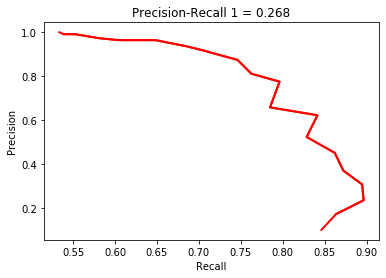

In [49]:
plt.plot(precision1_array,recall1_array, 'r', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall 1 = {}'.format(round(area1,3)))
plt.show()

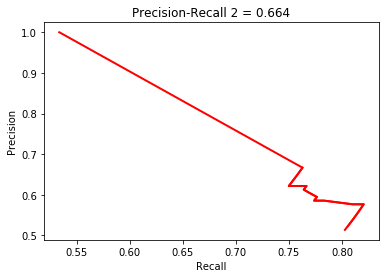

In [50]:
plt.plot(precision2_array,recall2_array, 'r', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall 2 = {}'.format(round(area2,3)))
plt.show()

In [51]:
## Area under precision-recall curve for classifier 2 performs better than 
## classifier 1, so therefore classifier 2 is a better model. 
## This goes against the AUC calculations, where Classifier 1 has a higher AUC 
## score than Classifier 2. 

